In [9]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
colors=sns.color_palette()


In [10]:
%autosave 3

Autosaving every 3 seconds


Statistical distribution
========================

Let's have a look how different statistical distributions look like, to have a better
idea what to use as prior on our inference bayesian exploration.

All the distributions available in scipy can be found on the docs here: http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

Let's start with Discrete distributions

Discrete Distributions
----------------------


* bernoulli:	A Bernoulli discrete random variable.
* binom:	A binomial discrete random variable.
* poisson:	A Poisson discrete random variable.
* ...



In [11]:
from scipy.stats import bernoulli, poisson, binom

Bernoulli distribution
-----------------------

Given a certain probability $p$, the Bernoulli distribution takes value $k=1$, meanwhile 
it takes $k=0$ in all the other cases $1-p$.

In other words:

$$
f(k;p) = \begin{cases}
    p & \text{if } k=1 \\\\ 
    1-p & \text{if } k=0
\end{cases}
$$

In [12]:
bernoulli.rvs(0.6, size=100)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

Text(0.5, 0.98, 'Bernoulli probability')

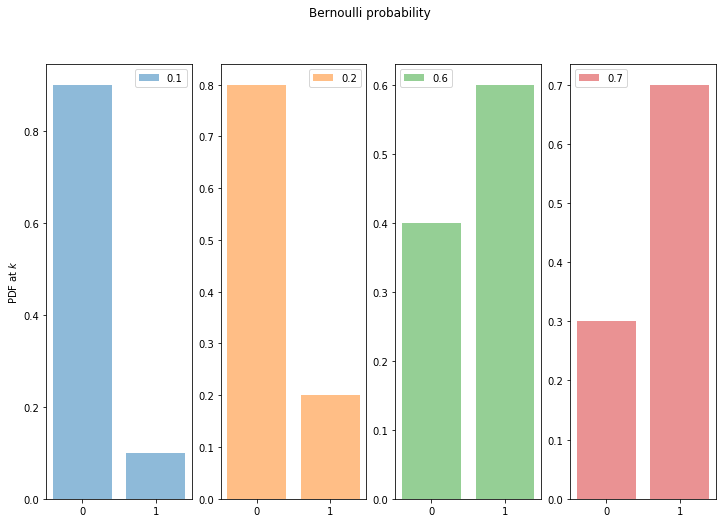

In [13]:
a = np.arange(2)

plt.figure(figsize=(12,8))
for i, p in enumerate([0.1, 0.2, 0.6, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(a, bernoulli.pmf(a, p), label=p, color=colors[i], alpha=0.5)
    ax.xaxis.set_ticks(a)

    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
    

plt.suptitle("Bernoulli probability")

Poisson Distribution
--------------------

Another discrete distribution, the *Poisson Distribution* is defined for all the integer positive number as

$$P(Z=k)=\frac{λ^ke^{−λ}}{k!}, k=0,1,2, \ldots$$


Text(0, 0.5, 'PDF at k')

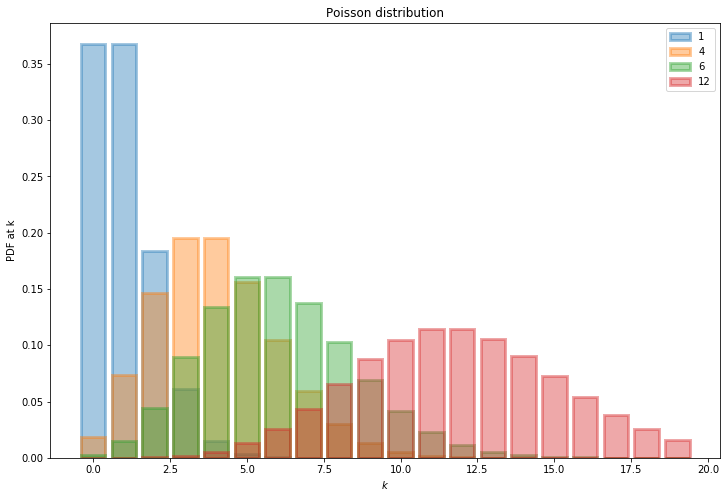

In [21]:
k = np.arange(20)

plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 4, 6, 12]):
    plt.bar(k, poisson.pmf(k, lambda_), label=lambda_, color=colors[i], alpha=0.4, edgecolor=colors[i], lw=3)
    plt.legend()
plt.title("Poisson distribution")
plt.xlabel("$k$")
plt.ylabel("PDF at k")
           


Text(0.5, 0, '$k$')

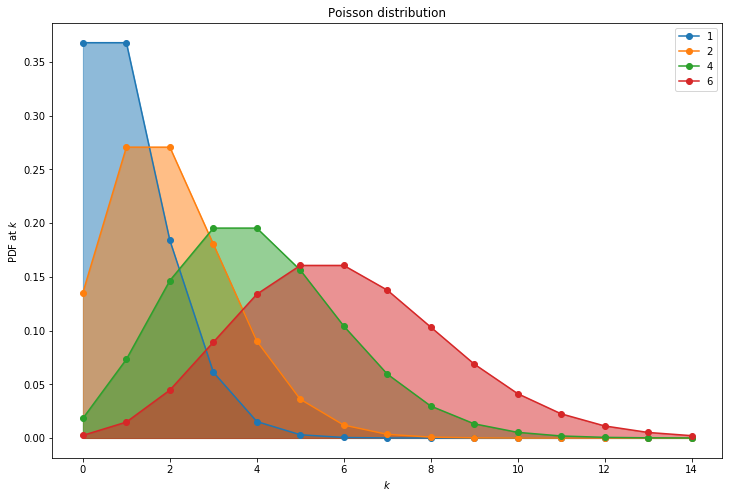

In [15]:
k = np.arange(15)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")

Binomial distribution
---------------------

Last but not least, the binomial distribution which is defined as:

$$f(k;n,p) = Pr(X = k) = {n \choose k} p^k (1-p)^{(n-k)}$$

where 

$${n \choose k} = \frac{n!}{k!(n-k)!}$$

with $k={1, 2, 3, \ldots}$

Text(0.5, 33.0, '$k$')

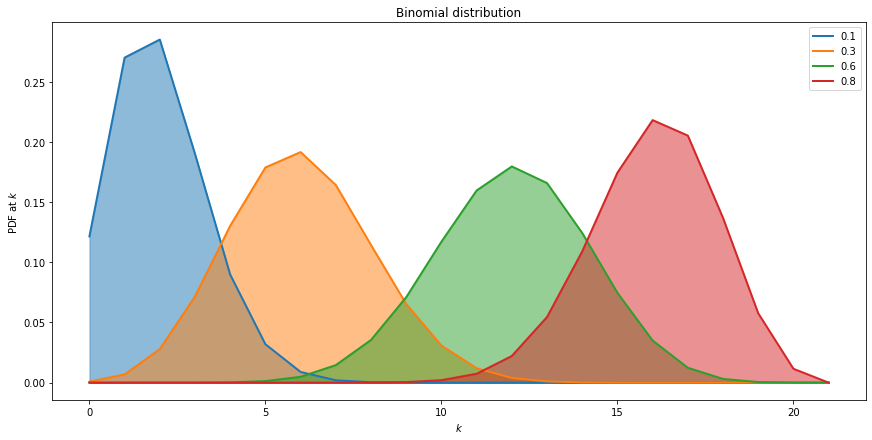

In [16]:
plt.figure(figsize=(12,6))
k = np.arange(0, 22)
for p, color in zip([0.1, 0.3, 0.6, 0.8], colors):
    rv = binom(20, p)
    plt.plot(k, rv.pmf(k), lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")

Continous Probability Distribution
----------------------------------

They are defined for any value of a positive $x$. A lot of distribution are defined on `scipy.stats`, so I will explore only som:

* alpha	An alpha continuous random variable.
* beta	A beta continuous random variable.
* gamma	A gamma continuous random variable.
* expon	An exponential continuous random variable.
* ...

Alpha
-----

The Alpha distribution is defined as 

$$
alpha.pdf(x,a) = \frac{1}{x^2 \Phi(a) \sqrt{2*pi}} * exp(-\frac{1}{2} (\frac{a-1}{x})^2), \,\, with \, x > 0, a > 0
$$


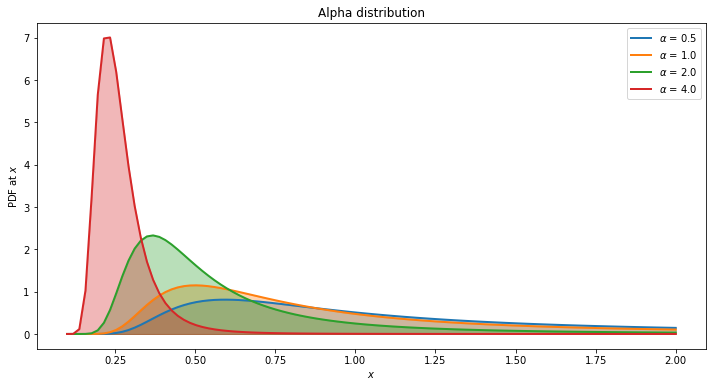

In [17]:
x = np.linspace(0.1, 2, 100)
alpha = scipy.stats.alpha
alphas = [0.5, 1, 2, 4]
plt.figure(figsize=(12,6))
for a,c in zip(alphas,colors):
    
    label=r"$\alpha$ = {0:.1f}".format(a)
    plt.plot(x, alpha.pdf(x, a), lw=2, 
              color=c, label=label)
    plt.fill_between(x, alpha.pdf(x, a), color=c, alpha = .33)
    

plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Alpha distribution")

plt.legend()


Beta distribution
-----------------

The Beta distribution is defined for a variabile rangin between 0 and 1. 

The pdf is defined as:

$$
beta.pdf(x, \alpha, \beta) = \frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1 - x)^{\beta-1}, \; with \;  0≤x≤1, \alpha>0, \beta>0
$$

Text(0.5, 0, '$x$')

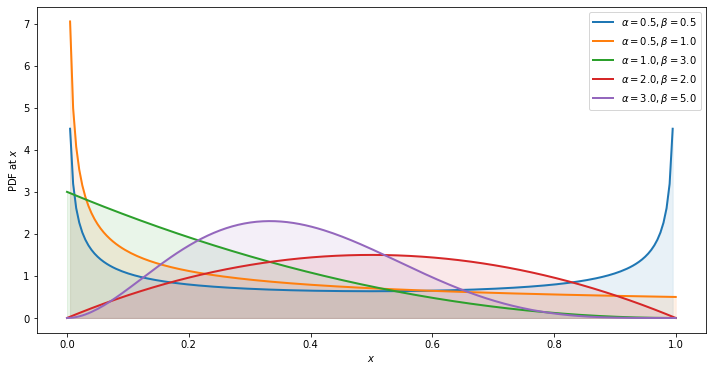

In [18]:
beta = scipy.stats.beta
x = np.linspace(0,1, num=200)


fig = plt.figure(figsize=(12,6))
for a, b, c in zip([0.5, 0.5, 1, 2, 3], [0.5, 1, 3, 2, 5], colors):
    plt.plot(x, beta.pdf(x, a, b), lw=2, 
             c=c, label = r"$\alpha = {0:.1f}, \beta={1:.1f}$".format(a, b))
    plt.fill_between(x, beta.pdf(x, a, b), color=c, alpha = .1)
    
    
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")


Gamma distribution
------------------

The gamma distribution uses the Gamma function (http://en.wikipedia.org/wiki/Gamma_function) and it has two shape parameters.

$$
gamma.pdf(x, \alpha, scale) = \lambda^\alpha * x^{(\alpha-1)} * \frac{exp(-\lambda * x)}{\gamma(\alpha)}, \, with \, x >= 0, \alpha> 0, \lambda > 0
$$

The scale parameter is equal = $1.0/\lambda$

Text(0.5, 0, '$x$')

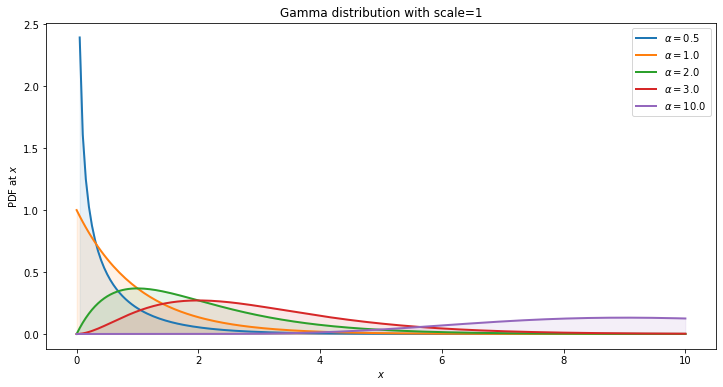

In [19]:
gamma = scipy.stats.gamma
plt.figure(figsize=(12, 6))
x = np.linspace(0, 10, num=200)

for a, c in zip([0.5, 1, 2, 3, 10], colors):
    plt.plot(x, gamma.pdf(x, a), lw=2, 
             c=c, label = r"$\alpha = {0:.1f}$".format(a))
    plt.fill_between(x, gamma.pdf(x, a), color=c, alpha = .1)
    
plt.legend(loc=0)
plt.title("Gamma distribution with scale=1")
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

Exponential
-----------

The Exponantial probability function is

$$ f_X(x|λ) = λ e^{−λx} , \, x≥0$$

Therefore, the random variable X has an exponential distribution with parameter λ, we say X is exponential and write

$$ X∼Exp(λ) $$

Given a specific λ, the expected value of an exponential random variable is equal to the inverse of λ, that is:

$$ E[X|λ]= \frac{1}{λ} $$

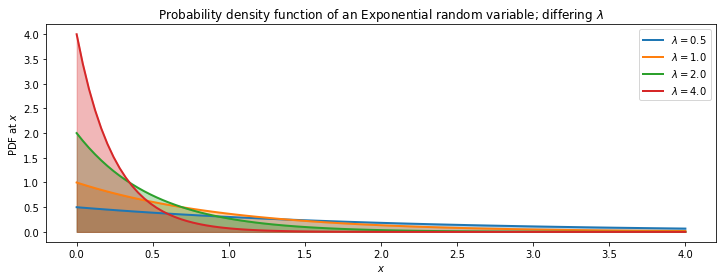

In [20]:
x = np.linspace(0,4, 100)
expo = scipy.stats.expon
lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expo.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expo.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");